<a href="https://colab.research.google.com/github/c0der-aryan/AI-poker-bot/blob/main/Cuda_working_PIKAN_MOTOR_SLOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pykan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import time

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from torch import autograd
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import matplotlib.pyplot as plt
from kan import KAN, LBFGS
import numpy as np
device = ("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
# mu0 = torch.tensor(4 * np.pi * 1e-7 , device=device, requires_grad=False)   # Vacuum permeability
# mur = torch.tensor(1.0, device=device, requires_grad=False)  # Relative permeability
# Ji = torch.tensor(250.0 , device=device, requires_grad=False) # Source term, adjust as necessary

# width, height = 0.8, 1.6
# num_points_x, num_points_y = 100, 20

# x = torch.linspace(0, width, num_points_x, device=device, requires_grad=False)
# y = torch.linspace(0, height, num_points_y, device=device, requires_grad=False)

# # try to understand what is meshgrid

# X, Y = torch.meshgrid(x, y, indexing='ij')
# coordinates = torch.stack([X.flatten(), Y.flatten()], dim=1).to(device)
# coordinates.requires_grad = True  # Ensure coordinates require grad

# model = KAN(width=[2,3,3, 3],
#             grid=5, k=10,
#             grid_eps=1.0,
#             noise_scale_base=0.25,
#             device = device)

# model = model.to(device)

# def batch_jacobian(func, x, create_graph=False):
#     def _func_sum(x):
#         device = x.device
#         return func(x).sum(dim=0).to(device)
#     return autograd.functional.jacobian(_func_sum, x, create_graph=create_graph).permute(1, 0, 2)

# def batch_hessian(func, x):
#     device = x.device
#     jacobian = batch_jacobian(func, x, create_graph=True).to(device)
#     hessians = []
#     for i in range(jacobian.size(1)):
#         grad = autograd.grad(jacobian[:, i].sum(), x, create_graph=True, retain_graph=True)[0]
#         hessians.append(grad.unsqueeze(1).to(device))
#     return torch.cat(hessians, dim=1)

# def motor_slot_residuals(coords):
#     coords = coords.clone().detach().requires_grad_(True).to(device)  # Ensure coords require grad
# #     model = model.to(device)
#     y_pred = model(coords)
#     grads = batch_jacobian(model, coords, create_graph=True)
#     hessians = batch_hessian(model, coords)

#     Hx, Hy, A = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]

#     dHx_dx, dHx_dy = grads[:, 0, 0], grads[:, 0, 1]
#     dHy_dx, dHy_dy = grads[:, 1, 0], grads[:, 1, 1]
#     dA_dx, dA_dy = grads[:, 2, 0], grads[:, 2, 1]

#     res1 = dHy_dx - dHx_dy - Ji
#     res2 = mu0 * mur * Hx - dA_dy
#     res3 = mu0 * mur * Hy + dA_dx

#     # note : 1 indicates y and 0 indicates x
#     # y = 1.6 = height for CD
#     # y = 0 for AB
#     # x = 0 or x = 0.8 = width for AD and BC

#     CD = (coords[:, 1] == height)
#     AB = (coords[:, 1] == 0)
#     ADBC = (coords[:, 0] == 0) | (coords[:, 0] == width)

#     A_CD = torch.mean((A[CD] - 0) ** 2)
#     Hx_AB = torch.mean((Hx[AB] - 0) ** 2)
#     Hy_AD_BC = torch.mean((Hy[ADBC] - 0) ** 2)

#     bc_loss = A_CD + Hx_AB + Hy_AD_BC
#     total_loss = torch.mean(res1 ** 2 + res2 ** 2 + res3 ** 2) + bc_loss
#     return total_loss

In [ ]:
# mu0 = torch.tensor(4 * np.pi * 1e-7 , device=device, requires_grad=False)   # Vacuum permeability
# mur = torch.tensor(1.0, device=device, requires_grad=False)  # Relative permeability
# Ji = torch.tensor(250.0 , device=device, requires_grad=False) # Source term, adjust as necessary

# width, height = 0.8, 1.6
# num_points_x, num_points_y = 100, 20

# x = torch.linspace(0, width, num_points_x, device=device, requires_grad=False)
# y = torch.linspace(0, height, num_points_y, device=device, requires_grad=False)

# # try to understand what is meshgrid

# X, Y = torch.meshgrid(x, y, indexing='ij')
# coordinates = torch.stack([X.flatten(), Y.flatten()], dim=1).to(device)
# coordinates.requires_grad = True  # Ensure coordinates require grad

# model = KAN(width=[2,3,3, 3], grid=5, k=10, grid_eps=1.0,
#             noise_scale_base=0.25 , device = device)
# model = model.to(device)

# def batch_jacobian(func, x, create_graph=False):
#     def _func_sum(x):
#         return func(x).sum(dim=0)
#     return autograd.functional.jacobian(_func_sum, x, create_graph=create_graph).permute(1, 0, 2)

# def batch_hessian(func, x):
#     jacobian = batch_jacobian(func, x, create_graph=True)
#     hessians = []
#     for i in range(jacobian.size(1)):
#         grad = autograd.grad(jacobian[:, i].sum(), x, create_graph=True, retain_graph=True)[0]
#         hessians.append(grad.unsqueeze(1))
#     return torch.cat(hessians, dim=1)

# def motor_slot_residuals(coords):
#     coords = coords.clone().detach().requires_grad_(True).to(device)  # Ensure coords require grad
#     y_pred = model(coords)
#     grads = batch_jacobian(model, coords, create_graph=True)
#     hessians = batch_hessian(model, coords)

#     Hx, Hy, A = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]

#     dHx_dx, dHx_dy = grads[:, 0, 0], grads[:, 0, 1]
#     dHy_dx, dHy_dy = grads[:, 1, 0], grads[:, 1, 1]
#     dA_dx, dA_dy = grads[:, 2, 0], grads[:, 2, 1]

#     res1 = dHy_dx - dHx_dy - Ji
#     res2 = mu0 * mur * Hx - dA_dy
#     res3 = mu0 * mur * Hy + dA_dx

#     # note : 1 indicates y and 0 indicates x
#     # y = 1.6 = height for CD
#     # y = 0 for AB
#     # x = 0 or x = 0.8 = width for AD and BC

#     CD = (coords[:, 1] == height)
#     AB = (coords[:, 1] == 0)
#     ADBC = (coords[:, 0] == 0) | (coords[:, 0] == width)

#     A_CD = torch.mean((A[CD] - 0) ** 2)
#     Hx_AB = torch.mean((Hx[AB] - 0) ** 2)
#     Hy_AD_BC = torch.mean((Hy[ADBC] - 0) ** 2)

#     bc_loss = A_CD + Hx_AB + Hy_AD_BC
#     total_loss = torch.mean(res1 ** 2 + res2 ** 2 + res3 ** 2) + bc_loss
#     return total_loss

In [ ]:
# !mkdir /content/drive/MyDrive/pikan_results/runs

In [ ]:
# # dataset = {}
# # dataset['train_input']  = coordinates
# # dataset['train_input'] = dataset['train_input'].to(device)
# writer = SummaryWriter("/content/drive/MyDrive/pikan results/run1/runs")

# start = time.time()

# def train():

#     global start
#     optimizer = LBFGS(model.parameters(), lr=1,
#                       history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)

#     steps = 2000 # 20 steps are enough
#     pbar = tqdm(range(steps), desc='Training Progress')

#     for step in pbar:
#         def closure():
#             optimizer.zero_grad()
#             loss = motor_slot_residuals(coordinates)
#             loss.backward()
#             return loss

#         optimizer.step(closure)
#         if step % 5 == 0:
#             curr = time.time()
#             time_taken = (curr-start)/60

#             current_loss = closure().item()

#             pbar.set_description("Step: %d | Loss: %f" %
#                                  (step, current_loss))

#             writer.add_scalar('Loss-train', current_loss, step)
#             writer.add_scalar('time_taken', time_taken, step)

#             print(f"\nStep: {step} \t Loss : {current_loss} \t Time : {time_taken} mins\n")
#             start = curr

#         if step % 100 == 0 :
#           model.save_ckpt(f'ckpt{step}',"/content/drive/MyDrive/pikan results/run1" )

# train()

# writer.close()


In [ ]:
mu0 = torch.tensor(4 * np.pi * 1e-7 , device=device, requires_grad=False)   # Vacuum permeability
mur = torch.tensor(1.0, device=device, requires_grad=False)  # Relative permeability
Ji = torch.tensor(250.0 , device=device, requires_grad=False) # Source term, adjust as necessary

width, height = 0.8, 1.6
num_points_x, num_points_y = 100, 20

x = torch.linspace(0, width, num_points_x, device=device, requires_grad=False)
y = torch.linspace(0, height, num_points_y, device=device, requires_grad=False)

# try to understand what is meshgrid

X, Y = torch.meshgrid(x, y, indexing='ij')
coordinates = torch.stack([X.flatten(), Y.flatten()], dim=1).to(device)
coordinates.requires_grad = True  # Ensure coordinates require grad

model = KAN(width=[2,3,3, 3], grid=5, k=10, grid_eps=1.0,
            noise_scale_base=0.25 , device = device)
model = model.to(device)

def batch_jacobian(func, x, create_graph=False):
    def _func_sum(x):
        return func(x).sum(dim=0)
    return autograd.functional.jacobian(_func_sum, x, create_graph=create_graph).permute(1, 0, 2)

def batch_hessian(func, x):
    jacobian = batch_jacobian(func, x, create_graph=True)
    hessians = []
    for i in range(jacobian.size(1)):
        grad = autograd.grad(jacobian[:, i].sum(), x, create_graph=True, retain_graph=True)[0]
        hessians.append(grad.unsqueeze(1))
    return torch.cat(hessians, dim=1)

def motor_slot_residuals(coords):
    coords = coords.clone().detach().requires_grad_(True).to(device)  # Ensure coords require grad
    y_pred = model(coords)
    grads = batch_jacobian(model, coords, create_graph=True)
    hessians = batch_hessian(model, coords)

    Hx, Hy, A = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]

    #     u_x, u_y = grads[:, 0, 0], grads[:, 0, 1]

    dHx_dx, dHx_dy = grads[:, 0, 0], grads[:, 0, 1]
    dHy_dx, dHy_dy = grads[:, 1, 0], grads[:, 1, 1]
    dA_dx, dA_dy = grads[:, 2, 0], grads[:, 2, 1]

#     continuity = u_x + v_y + eps * p
#     x_momentum = u * u_x + v * u_y + (1 / rho) * p_x - nu * (u_xx + u_yy)
#     y_momentum = u * v_x + v * v_y + (1 / rho) * p_y - nu * (v_xx + v_yy)

    res1 = dHy_dx - dHx_dy - Ji
    res2 = mu0 * mur * Hx - dA_dy
    res3 = mu0 * mur * Hy + dA_dx

    # note : 1 indicates y and 0 indicates x
    # y = 1.6 = height for CD
    # y = 0 for AB
    # x = 0 or x = 0.8 = width for AD and BC

    CD = (coords[:, 1] == height)
    AB = (coords[:, 1] == 0)
    ADBC = (coords[:, 0] == 0) | (coords[:, 0] == width)

    A_CD = torch.mean((A[CD] - 0) ** 2)
    Hx_AB = torch.mean((Hx[AB] - 0) ** 2)
    Hy_AD_BC = torch.mean((Hy[ADBC] - 0) ** 2)

    bc_loss = A_CD + Hx_AB + Hy_AD_BC
    total_loss = torch.mean(res1 ** 2 + res2 ** 2 + res3 ** 2) + bc_loss
    return total_loss

writer = SummaryWriter("/content/drive/MyDrive/pikan results/run1/runs")

def train(model = model):
    global start
    model = model.to(device)
    print(model.device)
    optimizer = LBFGS(model.parameters(), lr=1,
                      history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)

    steps = 2000 # 20 steps are enough
    pbar = tqdm(range(steps), desc='Training Progress')

    for step in pbar:
      def closure():
        optimizer.zero_grad()
        loss = motor_slot_residuals(coordinates)
        loss.backward()
        return loss

      optimizer.step(closure)
      if step % 5 == 0:
        curr = time.time()
        time_taken = (curr-start)/60

        current_loss = closure().item()

        pbar.set_description("Step: %d | Loss: %f" %
                             (step, current_loss))

        writer.add_scalar('Loss-train', current_loss, step)
        writer.add_scalar('time_taken', time_taken, step)

        print(f"\nStep: {step} \t Loss : {current_loss} \t Time : {time_taken} mins\n")
        start = curr

      if step % 100 == 0 :
        model.save_ckpt(f'ckpt{step}',"/content/drive/MyDrive/pikan results/run1" )

train()

writer.close()


cuda


Step: 0 | Loss: 15505.404297:   0%|          | 1/2000 [00:12<6:44:28, 12.14s/it]


Step: 0 	 Loss : 15505.404296875 	 Time : 9.39798347155253 mins

save this model to /content/drive/MyDrive/pikan results/run1/ckpt0


Step: 5 | Loss: 4651.924316:   0%|          | 6/2000 [01:12<6:50:11, 12.34s/it]


Step: 5 	 Loss : 4651.92431640625 	 Time : 1.008639363447825 mins



Step: 10 | Loss: 13.378579:   1%|          | 11/2000 [02:10<6:20:30, 11.48s/it]


Step: 10 	 Loss : 13.378579139709473 	 Time : 0.9568201740582783 mins



Step: 15 | Loss: 0.216353:   1%|          | 16/2000 [03:04<5:59:17, 10.87s/it]


Step: 15 	 Loss : 0.2163529098033905 	 Time : 0.9058992147445679 mins



Step: 20 | Loss: 0.061151:   1%|          | 21/2000 [03:59<6:01:02, 10.95s/it]


Step: 20 	 Loss : 0.06115074083209038 	 Time : 0.9198016921679179 mins



Step: 25 | Loss: 0.035525:   1%|▏         | 26/2000 [04:52<5:56:17, 10.83s/it]


Step: 25 	 Loss : 0.035525403916835785 	 Time : 0.8796251296997071 mins



Step: 30 | Loss: 0.032219:   2%|▏         | 31/2000 [05:46<5:49:53, 10.66s/it]


Step: 30 	 Loss : 0.03221879154443741 	 Time : 0.8949687361717225 mins



Step: 35 | Loss: 0.023434:   2%|▏         | 36/2000 [06:39<5:52:13, 10.76s/it]


Step: 35 	 Loss : 0.02343377284705639 	 Time : 0.8921566883722941 mins



Step: 40 | Loss: 0.015468:   2%|▏         | 41/2000 [07:36<6:11:38, 11.38s/it]


Step: 40 	 Loss : 0.015468248166143894 	 Time : 0.9500931223233541 mins



Step: 45 | Loss: 0.011987:   2%|▏         | 46/2000 [08:33<6:09:33, 11.35s/it]


Step: 45 	 Loss : 0.011987337842583656 	 Time : 0.9421908299128214 mins



Step: 50 | Loss: 0.009137:   3%|▎         | 51/2000 [09:30<6:19:25, 11.68s/it]


Step: 50 	 Loss : 0.009136647917330265 	 Time : 0.9637635509173076 mins



Step: 55 | Loss: 0.008542:   3%|▎         | 56/2000 [10:29<6:35:13, 12.20s/it]


Step: 55 	 Loss : 0.008541716262698174 	 Time : 0.9837272564570109 mins



Step: 60 | Loss: 0.008032:   3%|▎         | 61/2000 [11:27<6:09:19, 11.43s/it]


Step: 60 	 Loss : 0.008032187819480896 	 Time : 0.9581771572430928 mins



Step: 65 | Loss: 0.007729:   3%|▎         | 66/2000 [12:26<6:31:56, 12.16s/it]


Step: 65 	 Loss : 0.0077291312627494335 	 Time : 0.9848909497261047 mins



Step: 70 | Loss: 0.007729:   4%|▎         | 71/2000 [12:43<2:34:27,  4.80s/it]


Step: 70 	 Loss : 0.0077291312627494335 	 Time : 0.2748490492502848 mins



Step: 75 | Loss: 0.007729:   4%|▍         | 76/2000 [13:00<1:57:44,  3.67s/it]


Step: 75 	 Loss : 0.0077291312627494335 	 Time : 0.28094422022501625 mins



Step: 80 | Loss: 0.007729:   4%|▍         | 81/2000 [13:17<1:56:36,  3.65s/it]


Step: 80 	 Loss : 0.0077291312627494335 	 Time : 0.29311308860778806 mins



Step: 85 | Loss: 0.007729:   4%|▍         | 86/2000 [13:34<1:50:38,  3.47s/it]


Step: 85 	 Loss : 0.0077291312627494335 	 Time : 0.2779688278834025 mins



Step: 90 | Loss: 0.007729:   5%|▍         | 91/2000 [13:51<1:58:17,  3.72s/it]


Step: 90 	 Loss : 0.0077291312627494335 	 Time : 0.2936369776725769 mins



Step: 95 | Loss: 0.007729:   5%|▍         | 96/2000 [14:09<1:56:27,  3.67s/it]


Step: 95 	 Loss : 0.0077291312627494335 	 Time : 0.29438348213831583 mins



Step: 100 | Loss: 0.007729:   5%|▌         | 101/2000 [14:26<1:51:36,  3.53s/it]


Step: 100 	 Loss : 0.0077291312627494335 	 Time : 0.28255602916081746 mins

save this model to /content/drive/MyDrive/pikan results/run1/ckpt100


Step: 105 | Loss: 0.007729:   5%|▌         | 106/2000 [14:42<1:46:01,  3.36s/it]


Step: 105 	 Loss : 0.0077291312627494335 	 Time : 0.27293917735417683 mins



Step: 110 | Loss: 0.007729:   6%|▌         | 111/2000 [14:59<1:45:13,  3.34s/it]


Step: 110 	 Loss : 0.0077291312627494335 	 Time : 0.27716602087020875 mins



Step: 115 | Loss: 0.007729:   6%|▌         | 116/2000 [15:17<1:55:27,  3.68s/it]


Step: 115 	 Loss : 0.0077291312627494335 	 Time : 0.3012465238571167 mins



Step: 120 | Loss: 0.007729:   6%|▌         | 121/2000 [15:34<1:49:43,  3.50s/it]


Step: 120 	 Loss : 0.0077291312627494335 	 Time : 0.2796920657157898 mins



Step: 125 | Loss: 0.007729:   6%|▋         | 126/2000 [15:51<1:47:21,  3.44s/it]


Step: 125 	 Loss : 0.0077291312627494335 	 Time : 0.2818448464075724 mins



Step: 130 | Loss: 0.007729:   7%|▋         | 131/2000 [16:08<1:48:27,  3.48s/it]


Step: 130 	 Loss : 0.0077291312627494335 	 Time : 0.28478674093882245 mins



Step: 135 | Loss: 0.007729:   7%|▋         | 136/2000 [16:25<1:50:14,  3.55s/it]


Step: 135 	 Loss : 0.0077291312627494335 	 Time : 0.29055248498916625 mins



Step: 140 | Loss: 0.007729:   7%|▋         | 141/2000 [16:42<1:45:51,  3.42s/it]


Step: 140 	 Loss : 0.0077291312627494335 	 Time : 0.2763128678003947 mins



Step: 145 | Loss: 0.007729:   7%|▋         | 146/2000 [16:58<1:42:55,  3.33s/it]


Step: 145 	 Loss : 0.0077291312627494335 	 Time : 0.275332510471344 mins



Step: 150 | Loss: 0.007729:   8%|▊         | 151/2000 [17:16<1:50:57,  3.60s/it]


Step: 150 	 Loss : 0.0077291312627494335 	 Time : 0.29014331897099815 mins



Step: 155 | Loss: 0.007729:   8%|▊         | 156/2000 [17:34<1:50:03,  3.58s/it]


Step: 155 	 Loss : 0.0077291312627494335 	 Time : 0.30224045117696124 mins



Step: 160 | Loss: 0.007729:   8%|▊         | 161/2000 [17:50<1:44:40,  3.42s/it]


Step: 160 	 Loss : 0.0077291312627494335 	 Time : 0.27516173919041953 mins



Step: 165 | Loss: 0.007729:   8%|▊         | 166/2000 [18:07<1:42:04,  3.34s/it]


Step: 165 	 Loss : 0.0077291312627494335 	 Time : 0.2770837783813477 mins



Step: 170 | Loss: 0.007729:   9%|▊         | 171/2000 [18:25<1:50:22,  3.62s/it]


Step: 170 	 Loss : 0.0077291312627494335 	 Time : 0.291944682598114 mins



Step: 175 | Loss: 0.007729:   9%|▉         | 176/2000 [18:42<1:47:16,  3.53s/it]


Step: 175 	 Loss : 0.0077291312627494335 	 Time : 0.28481101989746094 mins



Step: 180 | Loss: 0.007729:   9%|▉         | 181/2000 [18:59<1:45:20,  3.47s/it]


Step: 180 	 Loss : 0.0077291312627494335 	 Time : 0.2848047653834025 mins



Step: 185 | Loss: 0.007729:   9%|▉         | 186/2000 [19:16<1:45:19,  3.48s/it]


Step: 185 	 Loss : 0.0077291312627494335 	 Time : 0.28585678736368814 mins



Step: 190 | Loss: 0.007729:  10%|▉         | 191/2000 [19:34<1:50:03,  3.65s/it]


Step: 190 	 Loss : 0.0077291312627494335 	 Time : 0.30011863708496095 mins



Step: 195 | Loss: 0.007729:  10%|▉         | 196/2000 [19:51<1:44:39,  3.48s/it]


Step: 195 	 Loss : 0.0077291312627494335 	 Time : 0.27948278983434044 mins



Step: 200 | Loss: 0.007729:  10%|█         | 201/2000 [20:07<1:41:39,  3.39s/it]


Step: 200 	 Loss : 0.0077291312627494335 	 Time : 0.2799313187599182 mins

save this model to /content/drive/MyDrive/pikan results/run1/ckpt200


Step: 205 | Loss: 0.007729:  10%|█         | 206/2000 [20:25<1:48:59,  3.65s/it]


Step: 205 	 Loss : 0.0077291312627494335 	 Time : 0.2950986663500468 mins



Step: 210 | Loss: 0.007729:  11%|█         | 211/2000 [20:44<1:56:29,  3.91s/it]


Step: 210 	 Loss : 0.0077291312627494335 	 Time : 0.3068492293357849 mins



Step: 215 | Loss: 0.007729:  11%|█         | 216/2000 [21:01<1:45:48,  3.56s/it]


Step: 215 	 Loss : 0.0077291312627494335 	 Time : 0.2872496724128723 mins



Step: 220 | Loss: 0.007729:  11%|█         | 221/2000 [21:18<1:47:10,  3.61s/it]


Step: 220 	 Loss : 0.0077291312627494335 	 Time : 0.2911481261253357 mins



Step: 225 | Loss: 0.007729:  11%|█▏        | 226/2000 [21:36<1:45:36,  3.57s/it]


Step: 225 	 Loss : 0.0077291312627494335 	 Time : 0.29117320775985717 mins



Step: 230 | Loss: 0.007729:  12%|█▏        | 231/2000 [21:53<1:42:31,  3.48s/it]


Step: 230 	 Loss : 0.0077291312627494335 	 Time : 0.2846285025278727 mins



Step: 235 | Loss: 0.007729:  12%|█▏        | 236/2000 [22:10<1:40:57,  3.43s/it]


Step: 235 	 Loss : 0.0077291312627494335 	 Time : 0.28325873215993247 mins



Step: 240 | Loss: 0.007729:  12%|█▏        | 241/2000 [22:27<1:45:07,  3.59s/it]


Step: 240 	 Loss : 0.0077291312627494335 	 Time : 0.2942086617151896 mins



Step: 245 | Loss: 0.007729:  12%|█▏        | 246/2000 [22:44<1:40:44,  3.45s/it]


Step: 245 	 Loss : 0.0077291312627494335 	 Time : 0.27613795598347984 mins



Step: 250 | Loss: 0.007729:  13%|█▎        | 251/2000 [23:01<1:38:42,  3.39s/it]


Step: 250 	 Loss : 0.0077291312627494335 	 Time : 0.2787204186121623 mins



Step: 255 | Loss: 0.007729:  13%|█▎        | 256/2000 [23:18<1:40:47,  3.47s/it]


Step: 255 	 Loss : 0.0077291312627494335 	 Time : 0.28379860719045 mins



Step: 260 | Loss: 0.007729:  13%|█▎        | 261/2000 [23:35<1:45:35,  3.64s/it]


Step: 260 	 Loss : 0.0077291312627494335 	 Time : 0.29541210730870565 mins



Step: 265 | Loss: 0.007729:  13%|█▎        | 266/2000 [23:52<1:40:11,  3.47s/it]


Step: 265 	 Loss : 0.0077291312627494335 	 Time : 0.2781307458877563 mins



Step: 270 | Loss: 0.007729:  14%|█▎        | 271/2000 [24:10<1:46:51,  3.71s/it]


Step: 270 	 Loss : 0.0077291312627494335 	 Time : 0.2965966780980428 mins



Step: 275 | Loss: 0.007729:  14%|█▍        | 276/2000 [24:28<1:46:04,  3.69s/it]


Step: 275 	 Loss : 0.0077291312627494335 	 Time : 0.29776105483373005 mins



Step: 280 | Loss: 0.007729:  14%|█▍        | 281/2000 [24:45<1:40:42,  3.52s/it]


Step: 280 	 Loss : 0.0077291312627494335 	 Time : 0.27803070545196534 mins



Step: 285 | Loss: 0.007729:  14%|█▍        | 286/2000 [25:01<1:37:31,  3.41s/it]


Step: 285 	 Loss : 0.0077291312627494335 	 Time : 0.2805591622988383 mins



Step: 290 | Loss: 0.007729:  15%|█▍        | 291/2000 [25:18<1:38:12,  3.45s/it]


Step: 290 	 Loss : 0.0077291312627494335 	 Time : 0.28016111453374226 mins



Step: 295 | Loss: 0.007729:  15%|█▍        | 296/2000 [25:36<1:41:18,  3.57s/it]


Step: 295 	 Loss : 0.0077291312627494335 	 Time : 0.2939295768737793 mins



Step: 300 | Loss: 0.007729:  15%|█▌        | 301/2000 [25:52<1:37:31,  3.44s/it]


Step: 300 	 Loss : 0.0077291312627494335 	 Time : 0.27740684350331624 mins

save this model to /content/drive/MyDrive/pikan results/run1/ckpt300


Step: 305 | Loss: 0.007729:  15%|█▌        | 306/2000 [26:09<1:35:18,  3.38s/it]


Step: 305 	 Loss : 0.0077291312627494335 	 Time : 0.2799492120742798 mins



Step: 310 | Loss: 0.007729:  16%|█▌        | 311/2000 [26:27<1:41:15,  3.60s/it]


Step: 310 	 Loss : 0.0077291312627494335 	 Time : 0.2902759035428365 mins



Step: 315 | Loss: 0.007729:  16%|█▌        | 316/2000 [26:44<1:38:46,  3.52s/it]


Step: 315 	 Loss : 0.0077291312627494335 	 Time : 0.2860658884048462 mins



Step: 320 | Loss: 0.007729:  16%|█▌        | 321/2000 [27:01<1:35:30,  3.41s/it]


Step: 320 	 Loss : 0.0077291312627494335 	 Time : 0.27864476839701335 mins



Step: 325 | Loss: 0.007729:  16%|█▋        | 326/2000 [27:20<1:51:43,  4.00s/it]


Step: 325 	 Loss : 0.0077291312627494335 	 Time : 0.31415069897969566 mins



Step: 330 | Loss: 0.007729:  17%|█▋        | 331/2000 [27:40<1:52:26,  4.04s/it]


Step: 330 	 Loss : 0.0077291312627494335 	 Time : 0.3413321614265442 mins



Step: 335 | Loss: 0.007729:  17%|█▋        | 336/2000 [27:57<1:37:49,  3.53s/it]


Step: 335 	 Loss : 0.0077291312627494335 	 Time : 0.2805215001106262 mins



Step: 340 | Loss: 0.007729:  17%|█▋        | 341/2000 [28:24<2:04:27,  4.50s/it]


Step: 340 	 Loss : 0.0077291312627494335 	 Time : 0.46082253058751427 mins



Step: 345 | Loss: 0.007729:  17%|█▋        | 346/2000 [28:41<1:37:19,  3.53s/it]


Step: 345 	 Loss : 0.0077291312627494335 	 Time : 0.2788846214612325 mins



Step: 350 | Loss: 0.007729:  18%|█▊        | 351/2000 [28:59<1:42:09,  3.72s/it]


Step: 350 	 Loss : 0.0077291312627494335 	 Time : 0.29707918961842855 mins



Step: 355 | Loss: 0.007729:  18%|█▊        | 356/2000 [29:16<1:36:25,  3.52s/it]


Step: 355 	 Loss : 0.0077291312627494335 	 Time : 0.28037299315134684 mins



Step: 355 | Loss: 0.007729:  18%|█▊        | 357/2000 [29:20<2:15:04,  4.93s/it]


KeyboardInterrupt: 

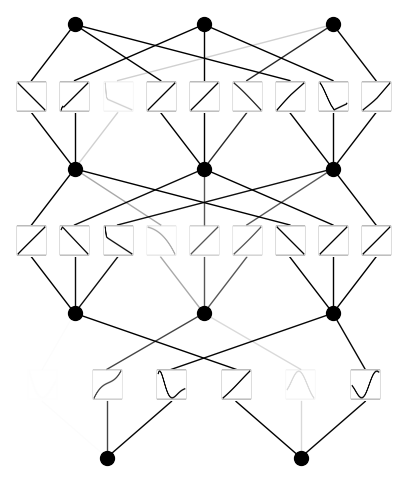

In [ ]:
model.plot(beta=10)

events.out.tfevents.1719511945.d490012490e6.216.14


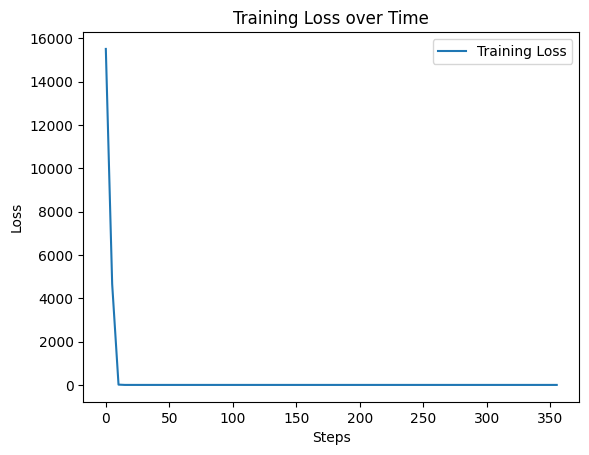

In [ ]:
import os
from tensorboard.backend.event_processing import event_accumulator

# Locate the TensorBoard logs
log_dir = "/content/drive/MyDrive/pikan results/run1/runs"

def plot_tensorboard_log(log_dir):
    # Find the latest log directory
    latest_run = sorted(os.listdir(log_dir))[-1]
    print(latest_run)
    event_path = os.path.join(log_dir, latest_run)

    # Load the event data
    ea = event_accumulator.EventAccumulator(event_path)
    ea.Reload()

    # Extract loss values
    loss_events = ea.Scalars('Loss-train')
    steps = [event.step for event in loss_events]
    losses = [event.value for event in loss_events]

    # Plot the loss
    plt.plot(steps, losses , label = "Training Loss")
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training Loss over Time')
    plt.legend()
    plt.show()

plot_tensorboard_log(log_dir)


In [ ]:
# coords = coordinates
# coords = coords.clone().detach().requires_grad_(True).to(device)  # Ensure coords require grad
# print(coords.device)
# model = model.to("cuda")
# print(model.device)

In [ ]:
pred = model(coordinates)
print(pred)